# Ex - 1
## BigGIS for BigDATA (Quantum Computing)
### Ashutosh Kumar Jha (Scientist/Engineer SF), IIRS, ISRO
### Sudikin Pramanik (Quantum computing coordinator), Student, IIRS, ISRO
`Basics of matrix and quantum computation on a single system`

Showing the system specification and requirements

In [14]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Matrix definition
Here we will be learn by creatig a simple array

In [1]:
from numpy import array

We will create a $ |0\rangle $ and a $|1\rangle $ vector and display them

In [2]:
ket0 = array([1,0])
ket1 = array([0,1])
display(ket0)
display(ket1)

array([1, 0])

array([0, 1])

Now we will try to display a row vector and a column vector

In [3]:
import numpy as np
from IPython.display import display, Math

# Define a row vector and a column vector
row_vector = np.array([1, 2, 3])
column_vector = np.array([[1], [2], [3]])

# Convert numpy arrays to LaTeX-friendly string formats
row_vector_latex = r"\text{Row vector: } \begin{bmatrix} " + \
                   " & ".join(map(str, row_vector)) + r" \end{bmatrix}"

# Correctly format the column vector in LaTeX
column_vector_latex = r"\text{Column vector: } \begin{bmatrix} " + \
                      " \\\\ ".join(map(str, column_vector.flatten())) + r" \end{bmatrix}"

# Display the dynamically generated LaTeX vectors
display(Math(row_vector_latex))
display(Math(column_vector_latex))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Having done the above thing it is not required to change the formulations to view as a ket and a bra.Usually the Qiskit takes ket vectors as a default and no need to go after how it looks.

# Matrix operation

Defining the matrix

In [4]:
M1 = array([[1,1],[0,0]])
M2 = array([[1,1],[1,0]])
M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

NumPy is designed to handle various types of array operations efficiently, and one feature it provides is broadcasting. Broadcasting allows NumPy to perform operations on arrays of different shapes by automatically expanding their dimensions when necessary.

In [5]:
from numpy import matmul

display(matmul(M1,ket1))
display(matmul(M1,M2))
display(matmul(M1,M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [0, 0]])

In [7]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.6 MB/s eta 0:00:00


Defining and displaying the state vectors

In [8]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u=Statevector([1/sqrt(2), 1/sqrt(2)])
v=Statevector([(1+2.0j)/3,-2/3])
w=Statevector([1/3, 2/3])

print("Statevectors u, v, w have been defined.")

Statevectors u, v, w have been defined.


Drawing the statevectors in LaTex

In [9]:
display(u.draw("latex"))
display(w.draw("text"))
display(v.draw("latex"))

<IPython.core.display.Latex object>

[0.33333333+0.j,0.66666667+0.j]

<IPython.core.display.Latex object>

Checking whether the state vectors are valid or invalid.

In [10]:
display(u.is_valid())
display(w.is_valid())
display(v.is_valid())

True

False

True

# Measurement


### Quantum Measurement and Normalization

When you perform a measurement on a quantum state in Qiskit using `Statevector.measure()`, the quantum state collapses to one of the basis states, and the new state vector is determined by this collapse. Let’s break this down conceptually.

#### Your Quantum State Before Measurement

You started with the following state vector:

$$
v = \frac{1+2i}{3} |0⟩ + \frac{-2}{3} |1⟩
$$

In terms of the vector components:

$$
v = \begin{bmatrix}
\frac{1+2i}{3} \\
\frac{-2}{3}
\end{bmatrix}
$$

This represents a superposition of the $ |0⟩ $ and $ |1⟩ $ basis states.

#### Step 1: Probability Calculation

Before the measurement, the probability of measuring each basis state is determined by the magnitude of the coefficients (amplitudes) in the state vector.

For $ |0⟩ $, the coefficient is $\frac{1+2i}{3}$. The probability of measuring $ |0⟩ $ is the square of the magnitude of this coefficient:

$$
P(0) = \left| \frac{1+2i}{3} \right|^2 = \frac{1^2 + 2^2}{9} = \frac{5}{9}
$$

For $ |1⟩ $, the coefficient is $\frac{-2}{3}$. The probability of measuring $ |1⟩ $ is the square of the magnitude of this coefficient:

$$
P(1) = \left| \frac{-2}{3} \right|^2 = \frac{4}{9}
$$

So:

- The probability of measuring $ |0⟩ $ is $\frac{5}{9}$.
- The probability of measuring $ |1⟩ $ is $\frac{4}{9}$.

#### Step 2: Measurement Result

When you call `v.measure()`, a random outcome is selected based on these probabilities. In your case, $ |0⟩ $ was measured, as indicated by the output '0'.

#### Step 3: State Vector Collapse

After the measurement, the quantum state collapses to the basis state that was measured. Since $ |0⟩ $ was measured, the state vector collapses to $|0⟩$, but the amplitude of $|0⟩$ needs to be renormalized based on its original amplitude before the measurement.

##### Normalization:

The state after the collapse needs to be normalized. The original coefficient of $|0⟩$ was:

$$
\frac{1+2i}{3}
$$

After the measurement, we normalize this coefficient. The normalization factor is the inverse of the square root of the original amplitude’s probability:

$$
\text{Normalization factor} = \frac{1}{\sqrt{P(0)}} = \frac{1}{\sqrt{\frac{5}{9}}} = \sqrt{\frac{9}{5}} = \frac{3}{\sqrt{5}}
$$

Now we multiply the original coefficient of $|0⟩$ by this normalization factor:

$$
\text{New coefficient of } |0⟩ = \frac{1+2i}{3} \times \frac{3}{\sqrt{5}} = \frac{1+2i}{\sqrt{5}}
$$

Thus, the post-measurement state vector becomes:

$$
\text{New state vector} = \begin{bmatrix}
\frac{1+2i}{\sqrt{5}} \\
0
\end{bmatrix}
$$

#### Final New State Vector

After the measurement, the quantum state collapses to:

$$
\begin{bmatrix}
\frac{1+2i}{\sqrt{5}} \\
0
\end{bmatrix}
$$

This vector represents the state where the system is now entirely in $|0⟩$, with the appropriate normalization applied to the coefficient of $|0⟩$.

#### Summary

- The `measure()` function picks a basis state ($|0⟩$ in this case) based on the probabilities calculated from the initial state.
- After the measurement, the state vector collapses to the measured basis state ($|0⟩$).
- The amplitude for $|0⟩$ is renormalized based on its original amplitude before the measurement, resulting in the new state vector:

$$
\begin{bmatrix}
\frac{1+2i}{\sqrt{5}} \\
0
\end{bmatrix}
$$


Understood. Here’s the corrected text:

---

Great question! The confusion seems to be about why we bother normalizing the state after measurement if we already know the system collapsed into a particular basis state (like $|0⟩$).

Let’s break this down conceptually.

### Understanding Quantum Measurement

Before measurement, your quantum system is in a **superposition** of the basis states $|0⟩$ and $|1⟩$. In your case, the initial state is:

$$
v = \frac{1+2i}{3} |0⟩ + \frac{-2}{3} |1⟩
$$

Each term in the superposition has an associated **probability amplitude**, and the square of its magnitude gives the probability of measuring that particular state.

- The probability of measuring $|0⟩$ is $P(0) = \frac{5}{9}$
- The probability of measuring $|1⟩$ is $P(1) = \frac{4}{9}$

When you **measure** the quantum system, it collapses to one of the basis states, either $|0⟩$ or $|1⟩$, with the corresponding probability.

In your example, suppose you measure and find the state has collapsed to $|0⟩$. Conceptually, this means the system is now definitely in the $|0⟩$ state (i.e., the measurement outcome is $|0⟩$).

### Why Normalize After Measurement?

Now, the question is: If we know the system is in $|0⟩$ after measurement, why do we still normalize the state?

Here’s the key idea:

- **Normalization ensures that the state is a valid quantum state** after the measurement.
- Even though the system has collapsed to $|0⟩$, **the amplitude of $|0⟩$ was originally part of a superposition**.

Before measurement, the system had some probability of being in $|0⟩$ (not a certainty). After measurement, you want to describe the state with certainty that it is $|0⟩$. To ensure that the post-measurement state remains valid, it needs to be normalized, so that the probability of being in this state is 1.

Let’s look at the difference between these two stages:

1. **Before Measurement**:
   - The state $v = \frac{1+2i}{3} |0⟩ + \frac{-2}{3} |1⟩$ is a superposition.
   - Probabilities: $P(0) = \frac{5}{9}$, $P(1) = \frac{4}{9}$.

2. **After Measurement**:
   - Once you measure and collapse to $|0⟩$, you know for sure it’s $|0⟩$, but to reflect this change properly in the state vector, you need to **remove the old superposition and probabilities**.
   - To do this, you **normalize the remaining amplitude** to 1.

Without normalization, the old probabilities would still be "carrying over" into the new state, making it invalid as a pure state after collapse.

### Conceptual Example

Let’s say you flip a coin where:
- **Heads** corresponds to $|0⟩$,
- **Tails** corresponds to $|1⟩$,
- But the coin is **weighted** so that heads comes up 5/9 of the time and tails comes up 4/9 of the time.

Now, you flip the coin and get **heads** (state $|0⟩$).

- Before the flip, you had a **weighted chance** of either heads or tails.
- After the flip, you now know **for sure** it’s heads (state $|0⟩$).

Even though you **knew the probability of heads** before flipping, after the flip, you don't care about the old probabilities. You just know it’s heads, so the outcome needs to reflect that with **certainty**—which is analogous to normalizing the quantum state after measurement to ensure it represents a definite outcome.

### Quantum State Collapse and Normalization

In quantum mechanics, the pre-measurement state is a **probabilistic description** of the system. After measurement, you have a **definite outcome** (in this case, $|0⟩$), but to describe the quantum system mathematically, you need to **remove any leftover uncertainty** from the old state. That’s why normalization is crucial.

It’s not that we’re normalizing the **basis state** itself (since $|0⟩$ is already normalized), but we’re ensuring the **entire state vector** reflects the post-measurement reality, where the system is now completely in the $|0⟩$ state, with a probability of 1.

---


In [11]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Sample_counts and histogram

So we will be running he simulator a number of times.The simulator will give back the measured values each number of times.In that way we can get a probability count.

{'0': 545, '1': 455}

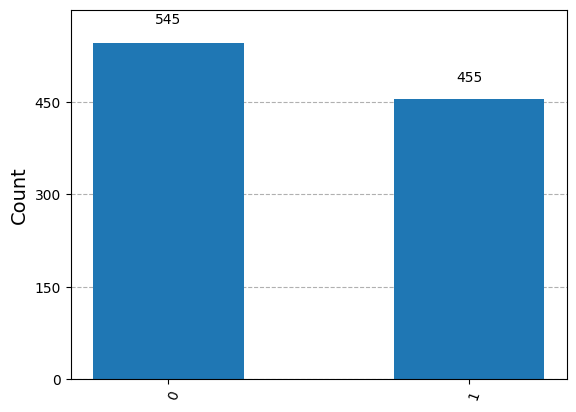

In [12]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)